In [1]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
dataset = pd.read_csv('dataset.csv', index_col = 'Unnamed: 0')
print(dataset.shape)

(24783, 6)


In [3]:
dataset.index=[np.arange(24783)]

In [4]:
dataset.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [5]:
y=dataset['class'].values
y
## 0:hate speech; 1:offensive language; 2:neither

array([2, 1, 1, ..., 1, 1, 2], dtype=int64)

## Visualization

(-0.5, 499.5, 399.5, -0.5)

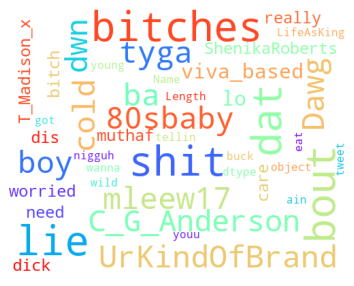

In [6]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image

# optional: could use mask images

# import mask image
# mask = np.array(Image.open('comment.png'))

# set stopwords
sw = set(STOPWORDS)
sw.add("RT")

# offensive language wordcloud
wc_offensive = WordCloud(
    width = 500,
    height = 400,
    random_state = 3,
    collocations = False,
    background_color = 'white',
    colormap = 'rainbow',
    stopwords = sw,
    max_words = 200,
    max_font_size = 60,
    #mask = mask
).generate(str(dataset.loc[dataset["class"]==1].tweet))

plt.figure(figsize=(10,5))
plt.imshow(wc_offensive)
plt.axis("off")

(-0.5, 499.5, 399.5, -0.5)

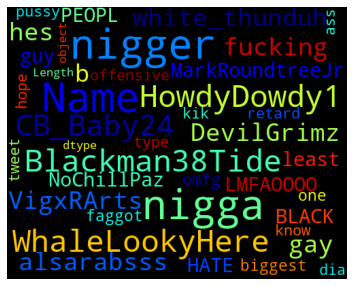

In [7]:
# hate speech wordcloud
wc_hate = WordCloud(
    width = 500,
    height = 400,
    random_state = 1,
    collocations = False,
    background_color = 'black',
    colormap = 'jet',
    stopwords = sw,
    max_words = 200,
    max_font_size = 60,
    #mask = mask
).generate(str(dataset.loc[dataset["class"]==0].tweet))

plt.figure(figsize=(10,5))
plt.imshow(wc_hate)
plt.axis("off")

(-0.5, 499.5, 399.5, -0.5)

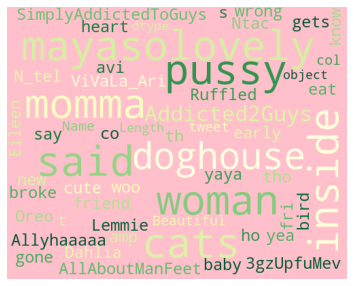

In [8]:
# neither wordcloud
wc_neither = WordCloud(
    width = 500,
    height = 400,
    random_state = 1,
    collocations = False,
    background_color = 'pink',
    colormap = 'YlGn',
    stopwords = sw,
    max_words = 200,
    max_font_size = 60,
    #mask = mask
).generate(str(dataset.loc[dataset["class"]==2].tweet))

plt.figure(figsize=(10,5))
plt.imshow(wc_neither)
plt.axis("off")

## Preprocess

In [9]:
# check for missing values
dataset.isnull().sum()

count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

no missing values

#### thought: hashtag analysis on tweets sentiment (optional) (if do this, remove hashtags later)
#### perhaps optionally remove stopwords in word2vec model, since the contexts matter and they often contain stopwords.

In [10]:
# data cleaning
stemmer = nltk.PorterStemmer()
stopword = set(stopwords.words('english'))
new_tweet = []
import string

def data_preprocess(review, remove_sw=False):
    review = re.sub(r'^\s+|\s+?$','',review) # remove leading and trailing whitespace
    review = re.sub(r'@[\w\-]+', '', review) # remove mentions
    review = re.sub(r'RT[\s]+', '', review) #remove retweet text 'RT'
    review = re.sub('[^a-zA-Z]',' ',review) #replace non-character with space
    review = review.lower() #lower the text
    review = re.sub('\[.*?\]', '', review)
    review = re.sub('https?://\S+|www\.\S+', '', review) # remove hyperlinks
    review = re.sub(r'#', '', review) # remove hashtags
    review = re.sub('[%s]' % re.escape(string.punctuation), '', review) # remove escape characters
    review = re.sub('\n', '', review)
    review = re.sub('\w*\d\w*', '', review)
    review = [word for word in review.split(' ') if word not in string.punctuation] #remove punctuations and tokenize
    review=" ".join(review)
    review = [stemmer.stem(word) for word in review.split(' ')] #use PorterStemmer
    if remove_sw:
        review = [word for word in review.split(' ') if word not in stopword]
    review=" ".join(review)
    new_tweet.append(review)
    return review

In [11]:
dataset['processed_tweet'] = dataset['tweet'].apply(data_preprocess)

In [12]:
dataset[['tweet','processed_tweet']].head()

,tweet,processed_tweet
0,!!! RT @mayasolovely: As a woman you shouldn't...,as a woman you shouldn t complain about clean ...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dat cold tyga dwn bad for cuffin dat hoe i...
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg you ever fuck a bitch and she start to cr...
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,she look like a tranni
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,the shit you hear about me might be true or it...


In [13]:
new_tweet

['as a woman you shouldn t complain about clean up your hous amp as a man you should alway take the trash out',
 'boy dat cold tyga dwn bad for cuffin dat hoe in the st place',
 'dawg you ever fuck a bitch and she start to cri you be confus as shit',
 'she look like a tranni',
 'the shit you hear about me might be true or it might be faker than the bitch who told it to ya',
 'the shit just blow me claim you so faith and down for somebodi but still fuck with hoe',
 'i can not just sit up and hate on anoth bitch i got too much shit go on',
 'caus i m tire of you big bitch come for us skinni girl',
 'amp you might not get ya bitch back amp that that',
 'hobbi includ fight mariam bitch',
 'keek is a bitch she curv everyon lol i walk into a convers like thi smh',
 'murda gang bitch it gang land',
 'so hoe that smoke are loser yea go on ig',
 'bad bitch is the onli thing that i like',
 'bitch get up off me',
 'bitch nigga miss me with it',
 'bitch plz whatev',
 'bitch who do you love',
 'bit

In [43]:
#import nltk.data
#nltk.download('punkt')
#tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [44]:
# split tweets into lists of sentences where each sentence is a list of words
#def tweet_tokenize(review, tokenizer, remove_sw=False):
#    tokenized_tweets = tokenizer.tokenize(review)
#    new_tweet = []
#    for tokenized_tweet in tokenized_tweets:
#        if len(tokenized_tweet) > 0:
#            new_tweet.append(data_preprocess(tokenized_tweet, remove_sw))
#    return new_tweet

In [45]:
#new_tweets = []
#for review in dataset['tweet']:
#    new_tweets += tweet_tokenize(review,tokenizer)

In [46]:
#new_tweets

['',
 'as a woman you shouldn t complain about clean up your hous',
 'amp as a man you should alway take the trash out',
 '',
 'boy dat cold tyga dwn bad for cuffin dat hoe in the st place',
 '',
 '',
 'dawg',
 'you ever fuck a bitch and she start to cri',
 'you be confus as shit',
 '',
 'she look like a tranni',
 '',
 'the shit you hear about me might be true or it might be faker than the bitch who told it to ya',
 '',
 'the shit just blow me claim you so faith and down for somebodi but still fuck with hoe',
 '',
 '',
 'i can not just sit up and hate on anoth bitch',
 'i got too much shit go on',
 '',
 'caus i m tire of you big bitch come for us skinni girl',
 '',
 'amp you might not get ya bitch back amp that that',
 'hobbi includ fight mariam bitch',
 'keek is a bitch she curv everyon lol i walk into a convers like thi',
 'smh',
 'murda gang bitch it gang land',
 'so hoe that smoke are loser',
 'yea go on ig',
 'bad bitch is the onli thing that i like',
 'bitch get up off me',
 'bit

In [14]:
# word2vec model
# simple tokenize
tokenized_tweet = dataset['processed_tweet'].apply(lambda x:x.split())

from gensim.models import word2vec
size = 200
min_count = 2
workers = 4
window = 10
sg = 1

w2v_model = word2vec.Word2Vec(tokenized_tweet,
                              vector_size = size,
                              min_count = min_count,
                              window = window,
                              sg = 1,
                              workers = workers)
model_name = "simplew2v"
w2v_model.save(model_name)
                    

In [15]:
# most similar words present in the model
w2v_model.wv.most_similar('woman')

[('actual', 0.8868504762649536),
 ('peni', 0.8846768736839294),
 ('person', 0.8778695464134216),
 ('strong', 0.8709834814071655),
 ('logic', 0.8676645159721375),
 ('less', 0.8670346736907959),
 ('whini', 0.8652042150497437),
 ('luck', 0.8568556904792786),
 ('unloy', 0.8559402823448181),
 ('daughter', 0.8543080687522888)]

In [16]:
# check the vector representation for any word from our corpus
w2v_model.wv.get_vector('shit')

array([-1.42086521e-01, -1.33318990e-01, -1.73196360e-01,  7.43948594e-02,
        2.01903269e-01, -9.58494749e-03, -7.65386969e-02,  3.72774929e-01,
        1.25879869e-01,  3.35234880e-01, -2.04088703e-01,  1.92982361e-01,
        2.39656925e-01, -2.88893953e-02,  1.42628700e-01,  1.38534725e-01,
       -2.12508693e-01, -2.93730140e-01, -3.54591578e-01, -2.38259986e-01,
       -2.69319832e-01,  1.16075799e-01,  2.72610486e-01,  1.78895682e-01,
        6.47879094e-02, -7.17881462e-03, -1.67982832e-01,  1.42772123e-01,
       -2.11191043e-01,  9.05779824e-02, -1.14813663e-01, -1.69922769e-01,
        2.73619175e-01,  8.49273875e-02, -3.59535336e-01,  5.15223891e-02,
       -1.97174683e-01, -9.64167491e-02, -4.51713465e-02, -2.71563292e-01,
       -3.74115467e-01,  1.09192699e-01, -2.04080820e-01, -1.91394296e-02,
        4.66491193e-01,  4.25422844e-03, -4.76945788e-02, -1.08770512e-01,
        1.61096185e-01, -7.98002854e-02,  6.85121119e-03, -1.04593866e-01,
       -2.26242468e-02, -

In [17]:
# check the similarity of two words
w2v_model.wv.similarity('man','dude')

0.800608

In [18]:
# retrieve the weights from the model
w2v_weights = w2v_model.wv.vectors
w2v_weights

array([[ 0.09147667,  0.01617126, -0.0437963 , ..., -0.01290477,
        -0.19870368,  0.17038903],
       [ 0.12360874, -0.00201312, -0.08161559, ..., -0.19413227,
        -0.00919265,  0.04459768],
       [ 0.24787281, -0.14788991, -0.17204526, ..., -0.2143306 ,
         0.05233857,  0.0045833 ],
       ...,
       [ 0.02102473, -0.02219046, -0.00796001, ..., -0.12092037,
         0.015028  ,  0.02319834],
       [ 0.02483015, -0.02039176,  0.01079541, ..., -0.15955596,
         0.02047972,  0.05300831],
       [ 0.0114861 ,  0.00323923,  0.00593403, ..., -0.12463413,
         0.02892943,  0.0666232 ]], dtype=float32)

In [25]:
#vocab_size, embedding_size = w2v_weights.shape
#print("Vocabulary Size: {} - Embedding Dim: {}".format(vocab_size, embedding_size))

Vocabulary Size: 7868 - Embedding Dim: 200


In [20]:
vocab = w2v_model.wv.key_to_index.keys()
len(vocab)

7868

In [21]:
word_vec_dict = {}
for word in vocab:
    word_vec_dict[word] = w2v_model.wv.get_vector(word)
print("The no of key-value pairs : ",len(word_vec_dict))

The no of key-value pairs :  7868


In [22]:
# find max length of tweets dataset['processed_tweet']
maxlen = -1
for i, rev in enumerate(new_tweet):
    tweet = rev.split()
    if (len(tweet)>maxlen):
        maxlen = len(tweet)
maxlen

34

In [24]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_tweet)
X = tokenizer.texts_to_sequences(tokenized_tweet)

In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
X = pad_sequences(X, padding='pre',maxlen=34)
X.shape # 24783 tweets, and have padded each tweet to be of max length

(24783, 34)

In [27]:
vocab_size = len(tokenizer.word_index) + 1
w_matrix = np.zeros((vocab_size, size))

for word, i in tokenizer.word_index.items():
    embedd_vector = word_vec_dict.get(word)
    if embedd_vector is not None:
        w_matrix[i] = embedd_vector

w_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.09147667,  0.01617126, -0.0437963 , ..., -0.01290477,
        -0.19870368,  0.17038903],
       [ 0.12360874, -0.00201312, -0.08161559, ..., -0.19413227,
        -0.00919265,  0.04459768],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

## simple LSTM model

In [31]:
from tensorflow.keras.layers import Flatten, Dropout, Dense, LSTM, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from keras.callbacks import EarlyStopping
from keras.initializers import Constant

In [33]:
model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = size, input_length = maxlen, embeddings_initializer=Constant(w_matrix))) 
model.add(Dropout(0.2))

model.add(LSTM(64))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation = 'linear'))

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 34, 200)           3863000   
                                                                 
 dropout (Dropout)           (None, 34, 200)           0         
                                                                 
 lstm (LSTM)                 (None, 64)                67840     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)               

In [35]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = 'accuracy')

In [38]:
from sklearn.model_selection import train_test_split
epochs = 5
batch_size = 32
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
hist = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = epochs,
                 batch_size = batch_size, shuffle=True)

Epoch 1/5
620/620 [==============================] - 32s 48ms/step - loss: 0.1850 - accuracy: 0.7645 - val_loss: 0.1017 - val_accuracy: 0.7771
Epoch 2/5
620/620 [==============================] - 30s 48ms/step - loss: 0.0994 - accuracy: 0.7756 - val_loss: 0.0899 - val_accuracy: 0.7769
Epoch 3/5
620/620 [==============================] - 30s 48ms/step - loss: 0.0757 - accuracy: 0.7821 - val_loss: 0.0864 - val_accuracy: 0.7795
Epoch 4/5
620/620 [==============================] - 30s 48ms/step - loss: 0.0583 - accuracy: 0.7926 - val_loss: 0.0968 - val_accuracy: 0.7757
Epoch 5/5
620/620 [==============================] - 30s 48ms/step - loss: 0.0469 - accuracy: 0.8023 - val_loss: 0.0960 - val_accuracy: 0.7769


## Visualization for Comparsion

In [ ]:
wc_offensive_new = WordCloud(
    width = 500,
    height = 400,
    random_state = 3,
    collocations = False,
    background_color = 'white',
    colormap = 'rainbow',
    stopwords = sw,
    max_words = 200,
    max_font_size = 60,
    #mask = mask
).generate(str(dataset.loc[dataset["class"]==1].tweet))

plt.figure(figsize=(10,5))
plt.imshow(wc_offensive_new)
plt.axis("off")

## Embedding

In [ ]:
#from sklearn.feature_extraction.text import CountVectorizer    
#cv=CountVectorizer(max_features=3600)
#x=cv.fit_transform(corpus).toarray()
from sklearn.feature_extraction.text import CountVectorizer    
cv=CountVectorizer(max_features=3600)
x=cv.fit_transform(new_tweet).toarray()

## Train and Text Split

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state=0)

## Classifiers

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)

In [ ]:
cm=confusion_matrix(y_test,pred)
print("confusion matrix")
print(cm)
print('Accuracy score: {}'.format(accuracy_score(y_test, pred)))
print('Precision score: {}'.format(precision_score(y_test, pred,average='weighted')))
print('Recall score: {}'.format(recall_score(y_test, pred,average='weighted')))

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [ ]:
print("confusion matrix")
print(cm)
print('Accuracy is {} '.format(accuracy_score(y_test, y_pred)))
print('Precision is {} '.format(precision_score(y_test, y_pred,average='weighted')))
print('Recall is {} '.format(recall_score(y_test, y_pred,average='weighted')))

### SVM

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
classifier = SVC(kernel='linear', C=1E10) # We choose C, which is a regularization parameter, very large. More details below
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [ ]:
print("confusion matrix")
print(cm)
print('Accuracy is {} '.format(accuracy_score(y_test, y_pred)))
print('Precision is {} '.format(precision_score(y_test, y_pred,average='weighted')))
print('Recall is {} '.format(recall_score(y_test, y_pred,average='weighted')))

## Deal with unbalanced data
### 1. pass Keras weights for each class

### 2. use data augamentation. 
Data augmentation can be done by tokenizing document into a sentence, shuffling and rejoining them to generate new texts, or replacing adjectives, verbs etc by its a synonym to generate different text with the same meaning. Any pre-trained word embedding or NLTK’s wordnet can be used to find the synonym of a word.
1. using language translation
2. using spacy(wordnet)
3. ussing wordembedding
git reference: https://github.com/kothiyayogesh/medium-article-code/tree/master/How%20I%20dealt%20with%20Imbalanced%20text%20dataset

### 3. remove redundant data (i.e for class offensive language)

## Manually implement LSTM or other models using TF or PyTorch

tutorial: https://github.com/piEsposito/pytorch-lstm-by-hand